About the DataSet :



*   Understand how screen time varies across gender, age groups, and device types.
*   Visualize patterns and relationships between demographics and screen usage.
*   Identify interesting trends that could inform parents, educators, and researchers.

In [1]:
# Loading of the data set
from google.colab import files
uploaded = files.upload()

Saving Indian_Kids_Screen_Time.csv to Indian_Kids_Screen_Time.csv


In [37]:
#Importing of the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [3]:
# For better visuals
sns.set(style="whitegrid")

In [4]:
# Read the dataSet
df =pd.read_csv('/content/Indian_Kids_Screen_Time.csv')
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [5]:
# 🔍 First and last 5 rows of the dataset
display(df.head())
display(df.tail())

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban


In [6]:
df.columns

Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

In [7]:
# ℹ️ Dataset info
df.info()

# 🔢 Data types and column names
print("\nColumn Names:")
print(df.columns.tolist()) # print the columns in List formt

print("\nData Types:")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB

Column Names:
['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Urban_or_Rural']

In [8]:
# 📊 Summary statistics for numerical columns
# df.describe(include='all') ---> for all dtypes
df.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [9]:
# Checking for Null Values
print("Any missing values?")
print(df.isnull().any())

print("\nTotal missing values:")
print(df.isnull().sum())


Any missing values?
Age                                  False
Gender                               False
Avg_Daily_Screen_Time_hr             False
Primary_Device                       False
Exceeded_Recommended_Limit           False
Educational_to_Recreational_Ratio    False
Health_Impacts                        True
Urban_or_Rural                       False
dtype: bool

Total missing values:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [10]:
print(df.isnull().sum())

Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [11]:
# 🧹 Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 44


In [12]:
# 📊 Frequency count for Health Impact Column
df['Health_Impacts'].value_counts()

,count
Health_Impacts,
Poor Sleep,2268
"Poor Sleep, Eye Strain",979
Eye Strain,644
"Poor Sleep, Anxiety",608
"Poor Sleep, Obesity Risk",452
Anxiety,385
"Poor Sleep, Eye Strain, Anxiety",258
Obesity Risk,252
"Poor Sleep, Eye Strain, Obesity Risk",188


In [13]:
# 📊 Frequency count for Primary_Device Column
df['Primary_Device'].value_counts()

,count
Primary_Device,
Smartphone,4568
TV,2487
Laptop,1433
Tablet,1224


In [14]:
# 📈 Average educational/recreational ratio by device
df.groupby('Primary_Device')['Educational_to_Recreational_Ratio'].mean()

,Educational_to_Recreational_Ratio
Primary_Device,
Laptop,0.399002
Smartphone,0.422077
TV,0.443703
Tablet,0.446005


In [15]:
df.isnull().sum()




,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [16]:
df['Health_Impacts']

,Health_Impacts
0,"Poor Sleep, Eye Strain"
1,Poor Sleep
2,Poor Sleep
3,NaN
4,"Poor Sleep, Anxiety"
...,...
9707,Poor Sleep
9708,Poor Sleep
9709,"Poor Sleep, Eye Strain, Anxiety"
9710,Poor Sleep


In [17]:
# 🧹 Filling missing values in 'Health_Impacts'
df['Health_Impacts'] = df['Health_Impacts'].fillna('Missing')

In [18]:
# ✅ Confirm missing values have been handled in this column
print("Missing values in 'Health_Impacts' after fill:", df['Health_Impacts'].isnull().sum())

Missing values in 'Health_Impacts' after fill: 0


In [19]:
#Frequency count for Health Impact Column
print("\nUnique values in 'Health_Impacts' after fill:")
df['Health_Impacts'].value_counts()


Unique values in 'Health_Impacts' after fill:


,count
Health_Impacts,
Missing,3218
Poor Sleep,2268
"Poor Sleep, Eye Strain",979
Eye Strain,644
"Poor Sleep, Anxiety",608
"Poor Sleep, Obesity Risk",452
Anxiety,385
"Poor Sleep, Eye Strain, Anxiety",258
Obesity Risk,252


In [20]:
'''Separating Numerical and Categorical Columns

 Categorical columns – object/string-type features
 Numerical columns – integer and float-type features '''

'Separating Numerical and Categorical Columns\n\n Categorical columns – object/string-type features\n Numerical columns – integer and float-type features '

In [21]:
# 🔍 Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns.tolist() if col != 'Health_Impacts']
print(f'Categorical columns :{categorical_cols}')
print(f'Numerical_cols :{numerical_cols}')

Categorical columns :['Gender', 'Primary_Device', 'Urban_or_Rural']
Numerical_cols :['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']


In [22]:
df['Gender'].value_counts()

,count
Gender,
Male,4942
Female,4770


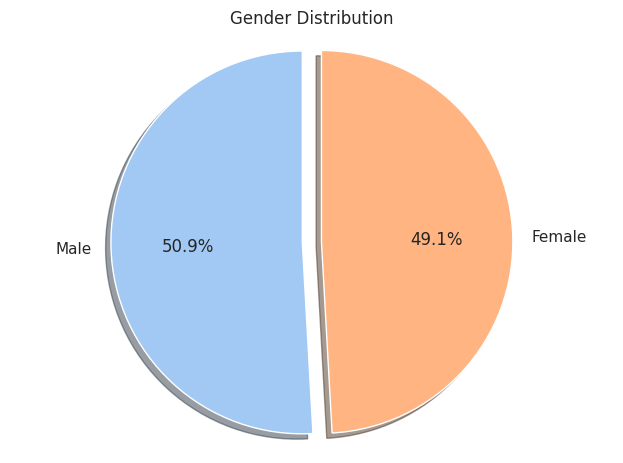

In [23]:
# Visualization

counts = df['Gender'].value_counts()

plt.pie(counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        explode=[0.05]*len(counts),
        shadow=True)
plt.title('Gender Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

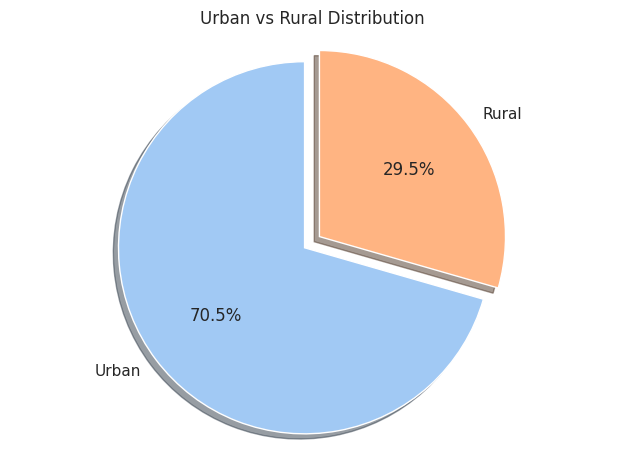

In [24]:
counts = df['Urban_or_Rural'].value_counts()

plt.pie(counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        explode=[0.05]*len(counts),
        shadow=True)
plt.title('Urban vs Rural Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

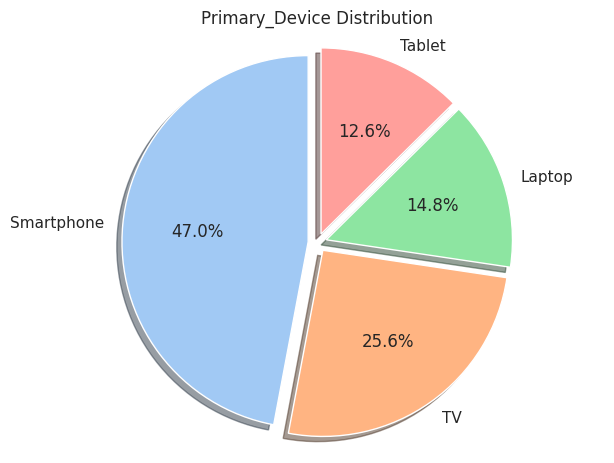

In [25]:
counts = df['Primary_Device'].value_counts()

plt.pie(counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        explode=[0.05]*len(counts),
        shadow=True)
plt.title('Primary_Device Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [26]:
cross=pd.crosstab(df['Age'],df['Primary_Device'])
cross

Primary_Device,Laptop,Smartphone,TV,Tablet
Age,,,,
8,0,388,335,189
9,0,345,348,192
10,0,340,362,175
11,199,411,172,84
12,182,438,169,78
13,171,457,192,90
14,181,452,174,89
15,189,408,182,85
16,170,443,187,76


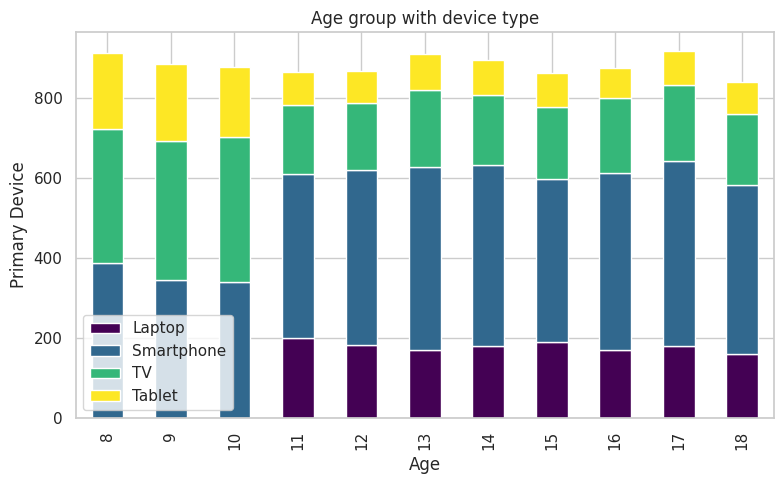

In [27]:
cross.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title("Age group with device type")
plt.ylabel("Primary Device")
plt.xlabel("Age")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


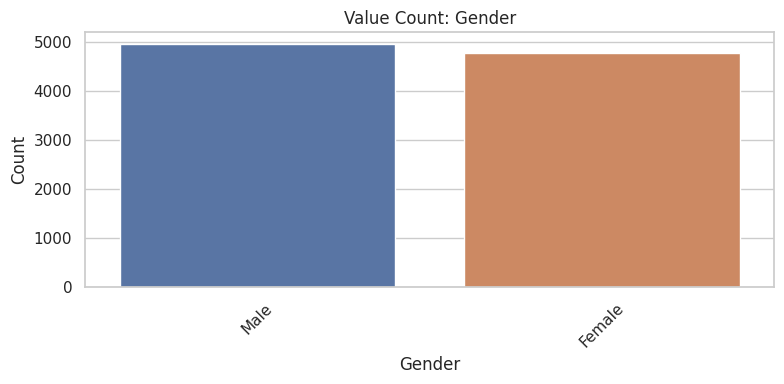

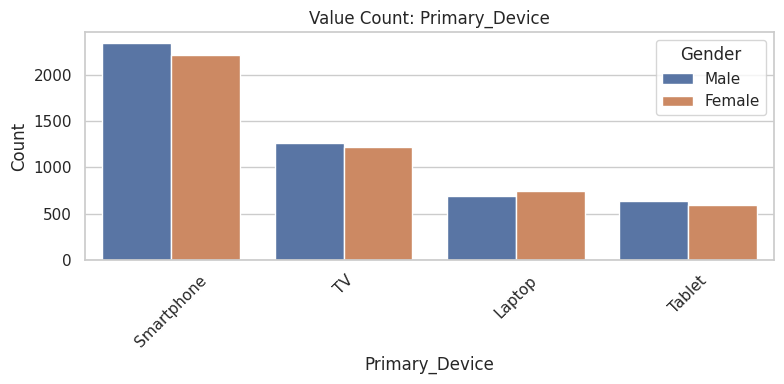

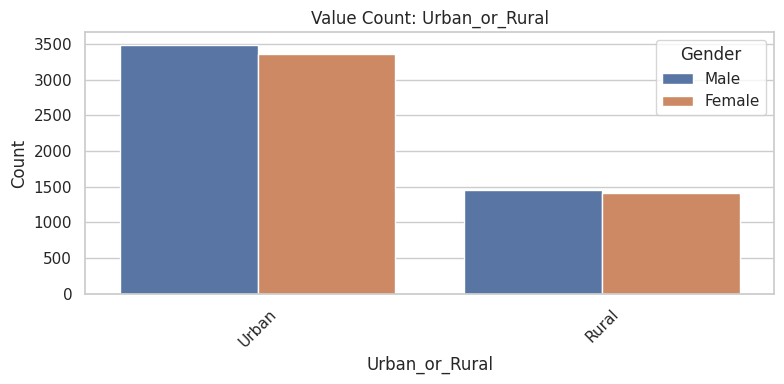

In [29]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, hue='Gender')
    plt.title(f'Value Count: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

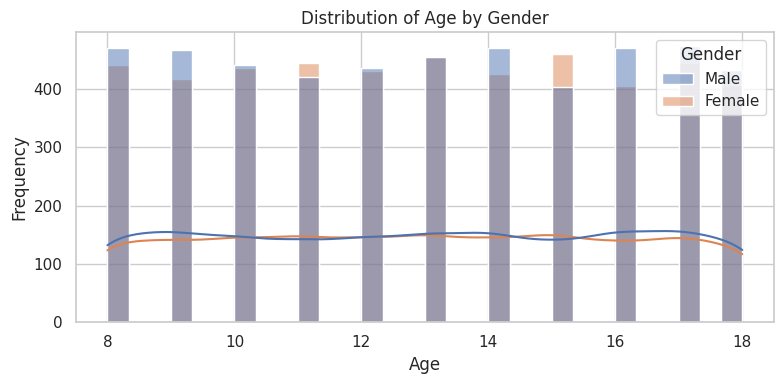

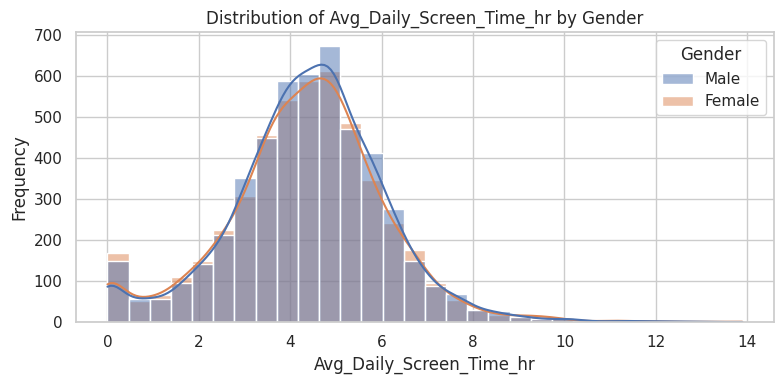

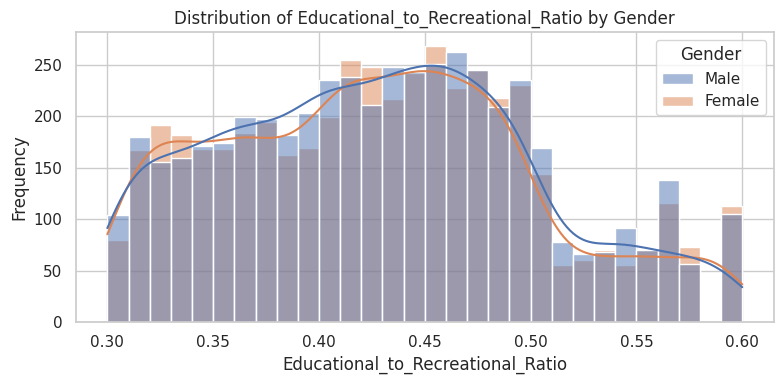

In [30]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=col, data=df, kde=True, bins=30, hue='Gender')
    plt.title(f"Distribution of {col} by Gender")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

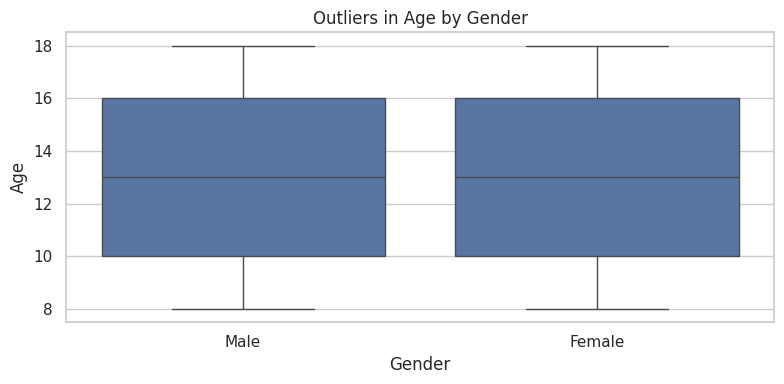

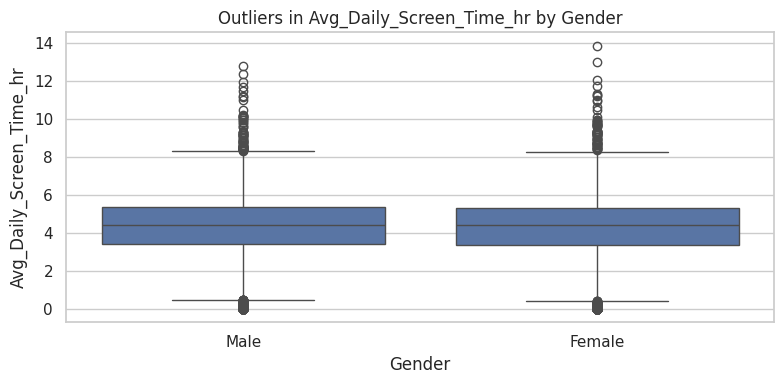

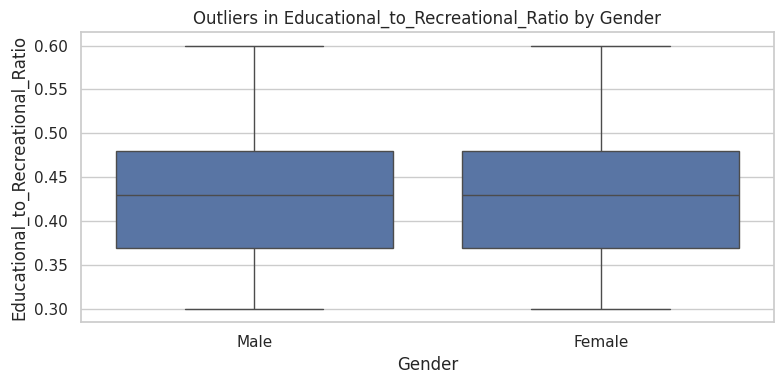

In [31]:
# Outlier detection
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Gender', y=col, data=df)
    plt.title(f"Outliers in {col} by Gender")
    plt.xlabel("Gender")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

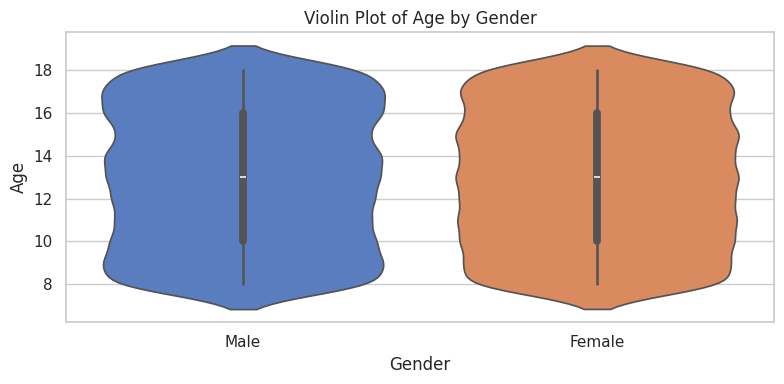

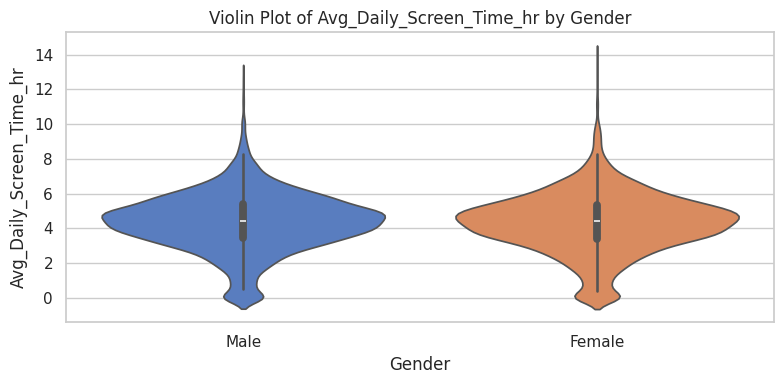

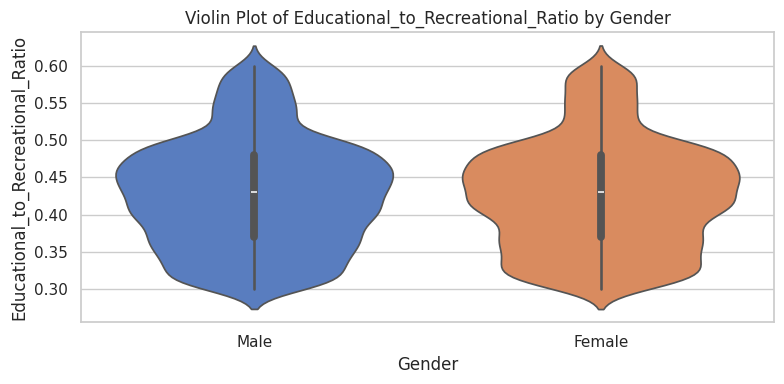

In [32]:
#distribution, central tendency, and variation of data across categories.
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Gender', y=col, data=df, palette='muted')
    plt.title(f"Violin Plot of {col} by Gender")
    plt.tight_layout()
    plt.show()

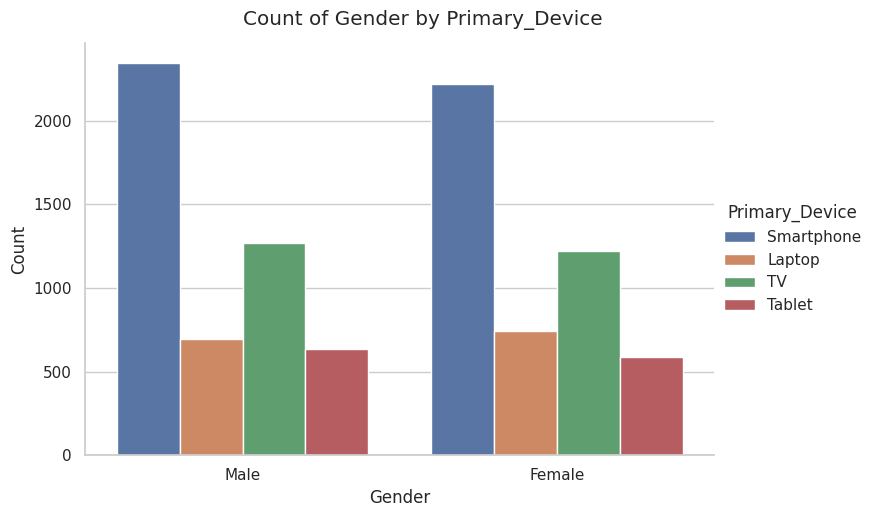

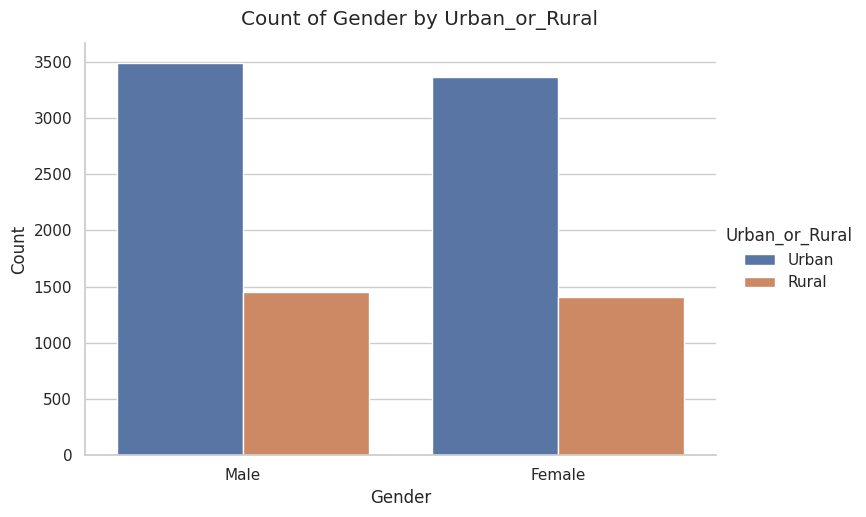

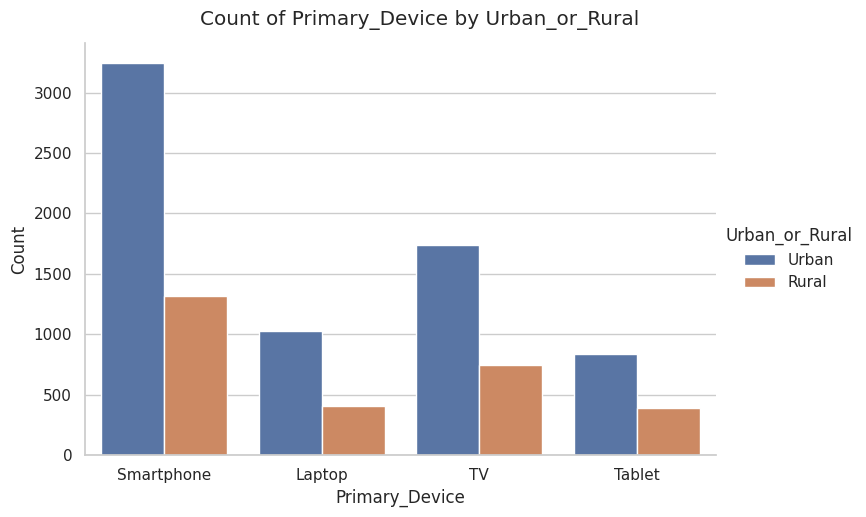

In [33]:
#pairwise relationships between categorical columns
for cat1, cat2 in combinations(categorical_cols, 2):
    g = sns.catplot(x=cat1, hue=cat2, data=df, kind="count", height=5, aspect=1.5)
    g.fig.suptitle(f"Count of {cat1} by {cat2}", y=1.03)
    g.set_axis_labels(cat1, "Count")
    plt.show()

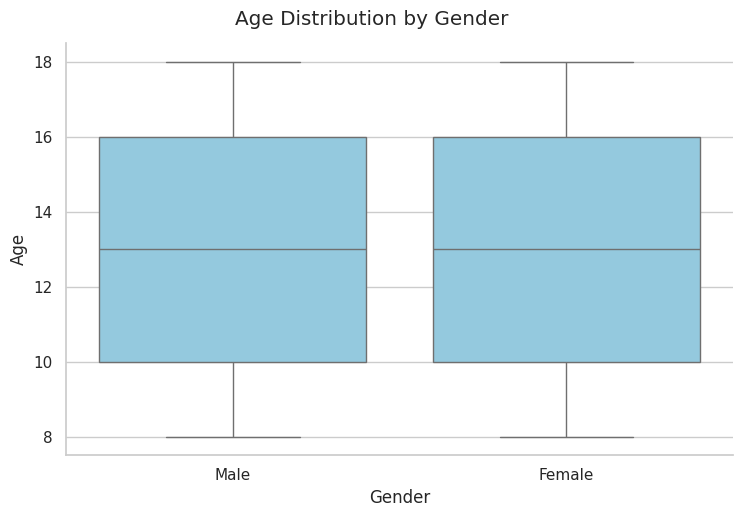

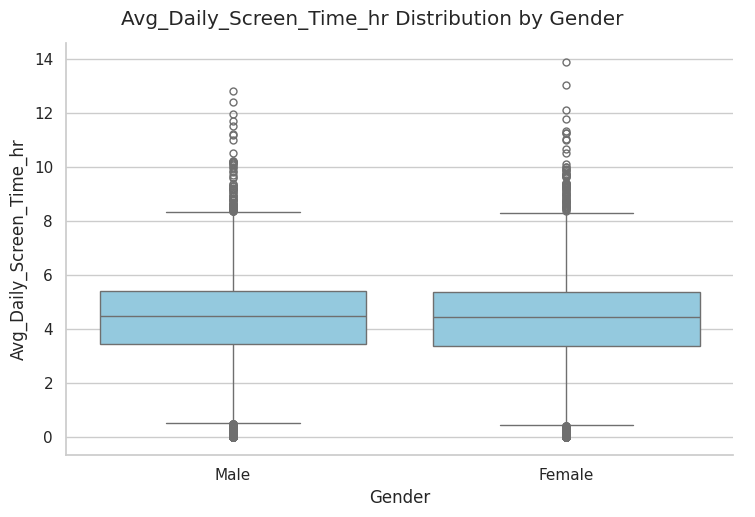

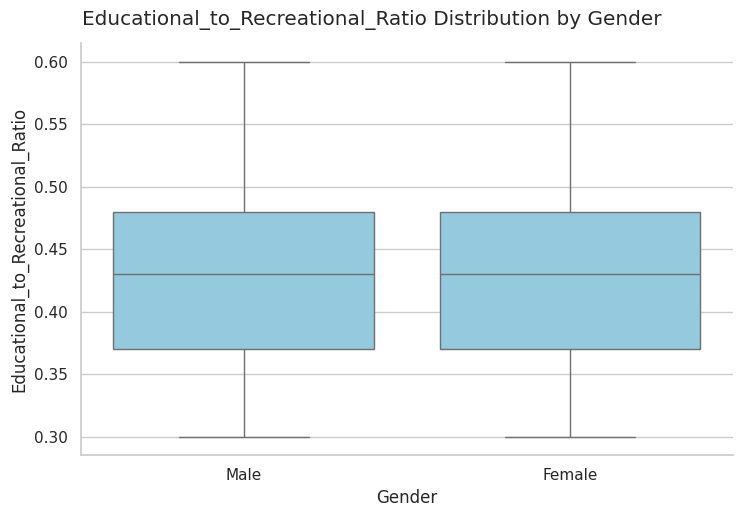

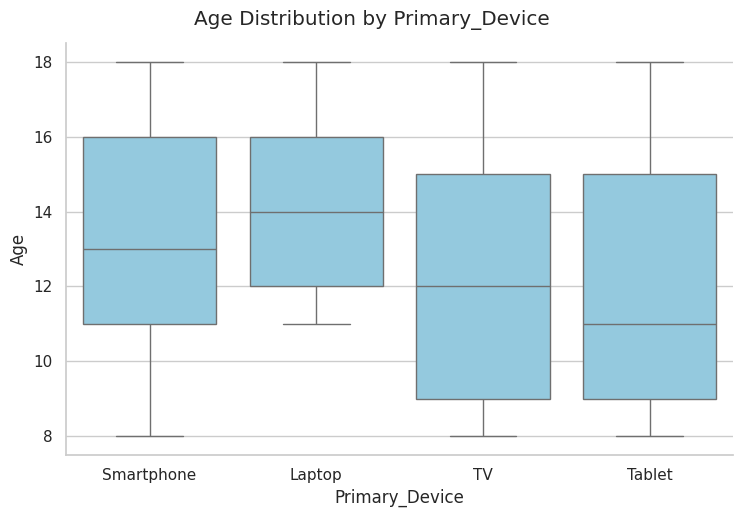

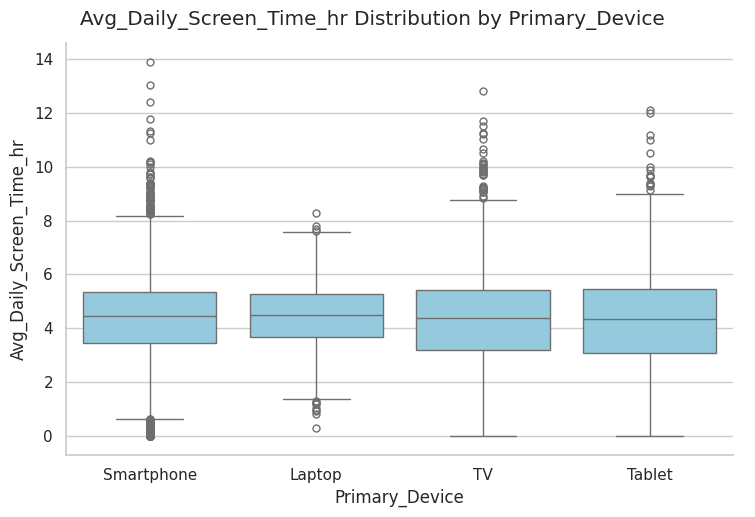

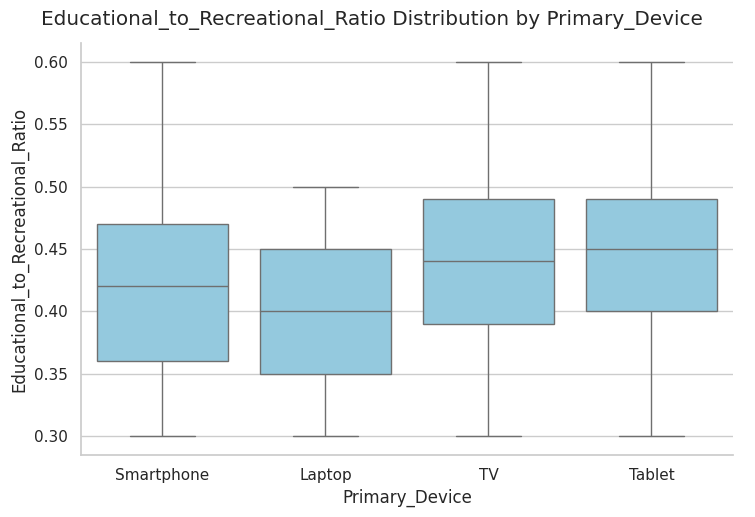

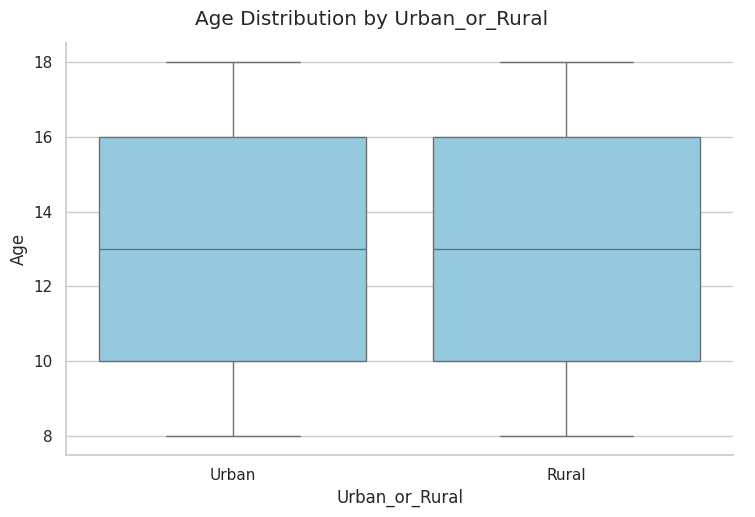

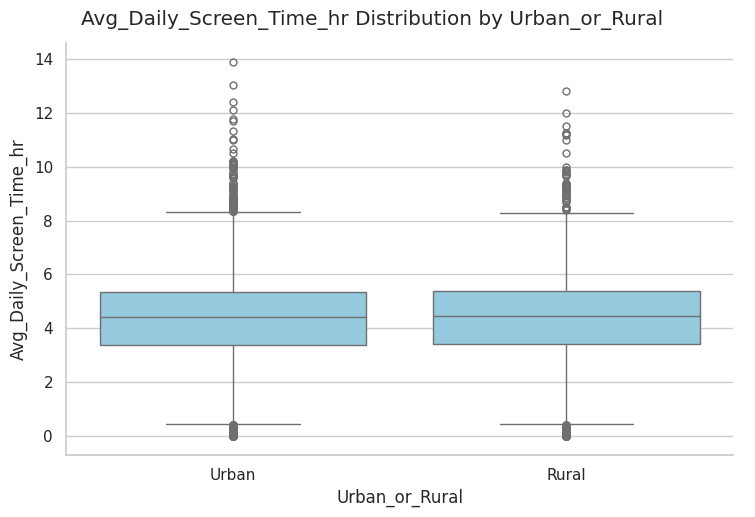

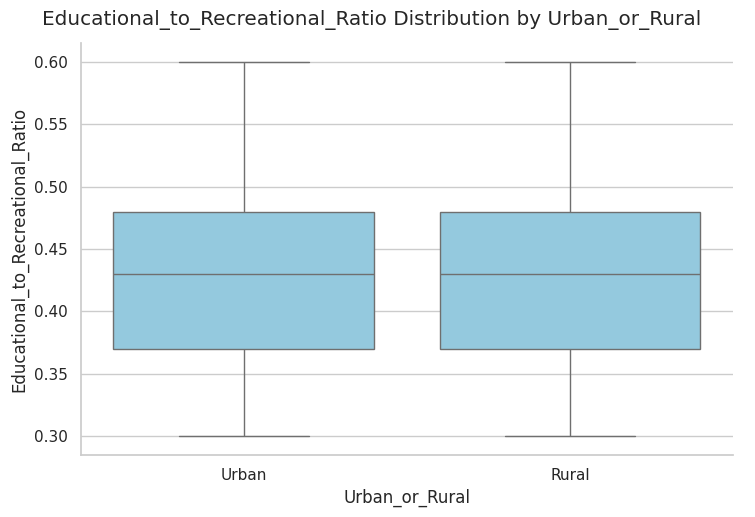

In [34]:
# pairwise relationships between categorical and numerical columns
for cat in categorical_cols:
    for num in numerical_cols:
        g = sns.catplot(x=cat, y=num, data=df, kind='box', height=5, aspect=1.5, color='skyblue')
        g.fig.suptitle(f'{num} Distribution by {cat}', y=1.03)
        g.set_axis_labels(cat, num)
        plt.show()

Health_Impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64


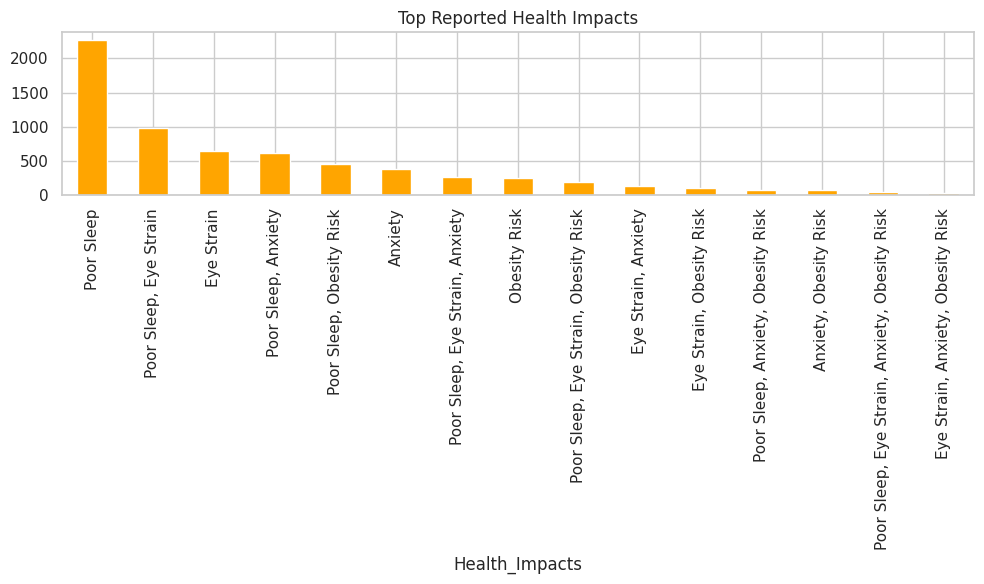

In [35]:
#  Health Impact Frequency
impact_counts = df['Health_Impacts'].value_counts()
impact_counts = impact_counts[impact_counts.index != 'Missing']
print(impact_counts)
plt.figure(figsize=(10, 6))
impact_counts.plot(kind='bar', color='orange')
plt.title('Top Reported Health Impacts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [39]:
# T-Test: Urban vs Rural Screen Time
urban = df[df['Urban_or_Rural'] == 'Urban']['Avg_Daily_Screen_Time_hr']
rural = df[df['Urban_or_Rural'] == 'Rural']['Avg_Daily_Screen_Time_hr']

t_stat, p_val = ttest_ind(urban, rural)
print(f"T-Test (Urban vs Rural): T={t_stat:.3f}, p={p_val:.5f}")

# Chi-Square Test: Device vs. Gender
contingency = pd.crosstab(df['Primary_Device'], df['Gender'])
chi2, p, dof, _ = chi2_contingency(contingency)
print(f"Chi-Square Test (Device vs Gender): χ2={chi2:.2f}, p={p:.5f}")

T-Test (Urban vs Rural): T=-0.773, p=0.43935
Chi-Square Test (Device vs Gender): χ2=4.73, p=0.19235


**Conclusion:**
After a detailed exploration of the Indian Kids Screentime 2025 dataset, here are the key takeaways:

🔹 Data Overview & Structure
The dataset contains both numerical and categorical features related to children's demographics, device usage, and screentime habits.
Missing values were handled and data types were correctly identified and separated.

🔹 Gender & Location Distribution
Gender distribution is [balanced / skewed] — (based on pie chart).
A noticeable difference exists between urban and rural children's access to digital devices.

🔹 Device Preferences
Children show a strong preference for [most used device here, e.g., Smartphones/Tablets].
Device usage patterns also vary by gender and region.

🔹 Numerical Feature Insights
Several numeric features (like total screentime or app usage) show skewed distributions and have visible outliers.
Boxplots and violin plots clearly revealed outliers, especially in [insert variable names].

🔹 Final Observations
Urban children generally show higher screentime.
Gender and age play a role in preferred platform and device.
These patterns may help build predictive models or policy insights for healthy screen usage.